# Numpy: selected advanced features & simple plotting

Szymon Talaga | 13.12.2019

<hr>

In [18]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
# Jupyter notebook directive for showing plots within chunks' output blocks
%matplotlib inline

## Special values and array comparisons

Numpy define several special values that allow us to deal with mathematical operations resulting in infinites or undefined results.

Positive infinity is represented with special value `np.inf`, negative infinity just with its negation `-np.inf`.

In [19]:
7 / 0

ZeroDivisionError: division by zero

In [20]:
numerator = np.array([1, 2, 3])
denominator = np.array([1, 0, 1])

numerator / denominator

/home/sztal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


array([ 1., inf,  3.])

As we see, division by zero does not raise an error in Numpy. Instead it creates an infinite value, which is consistent with the two following basic mathematical facts:

$$\lim_{x \to 0} \frac{1}{x} = \infty$$
$$\lim_{x \to \infty} \frac{1}{x} = 0$$

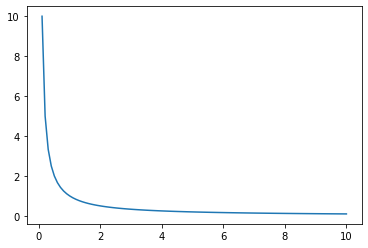

In [3]:
# Graphically this means:
X = np.linspace(0.1, 10, 100)
_ = plt.plot(X, 1 / X)

Numpy infinites are useful and nice, because they still allow us to compute (they are treated just as very, very large/small numbers).

In [24]:
432 / np.inf
0.00000000000000001 * np.inf
0 * np.inf
np.array([0]) / np.array([0])

0.0

inf

nan

/home/sztal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan])

However, results of some mathematical operations can not be determined that easily. For instance,

$$\frac{0}{0}$$

does not really have any proper meaning, as the numerator is non-existant, while the denominator tries to make it infinitely large.

To represent this kind of an operation Numpy uses a special value `np.nan` (not-a-number).

In [25]:
numerator = np.array([1, 0, 3])
denominator = np.array([1, 0, 1])

numerator / denominator

/home/sztal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([ 1., nan,  3.])

The special feature of `np.nan` is that it _destroys_ every computation. Any computation including even a single `np.nan` value will always yield `np.nan` as a result.

In [26]:
print(7 * np.nan)
print(np.log(np.nan))
print(0 / np.nan)

nan
nan
nan


To work and detect values such as `np.inf` and `np.nan` we use special (vectorized) functions such as `np.isfinite`, `np.isinf` and `np.isnan`.

**IMPORTANT.** `np.nan` and `np.inf` are always treated as floating-point numbers. So any array that contain them will be implicitly converted to float `dtype`.

In [27]:
X = np.array([np.inf, -np.inf, np.nan, 1])
X

array([ inf, -inf,  nan,   1.])

In [28]:
# Check if values are finite
np.isfinite(X)

array([False, False, False,  True])

In [29]:
# Check if value are infinite
np.isinf(X)

array([ True,  True, False, False])

In [30]:
# Check if value is nan
np.isnan(X)

array([False, False,  True, False])

### Exercise 1.

You are provided with scores from two exams for a group of 10 students. You need to compute rations of those scores (exam 2 / exam 1).

The problem is that some students may have zero points (if they missed an exam).

Define three variables:

* `G_both` : an array with grades for students who took both exams.
* `G1` : an array with grades for students who took only the first exam.
* `G2` : an array with grades for students who took only the second exam.
* `G_none` : an array with grades students who did not take any of the exams.

You will have to do this in two different ways.

1. Use a boolean mask
2. Use a 1D array of ratios of grades.

HINT. When using ratios you should base your solution on `np.isfinite`, `np.isinf` and `np.isnan`.

HINT 2. Remeber that you can access columns of the grade array like this `G[:, 0]` or `G[:, 1]`.

In [32]:
G = np.array([
    [2.2, 5.],
    [0, 7.7],
    [6., 9.9],
    [0, 0],
    [10, 0],
    [4, 3.3],
    [5, 0],
    [0, 9.9],
    [1, 3.4],
    [0, 8.1]
])

In [41]:
# Define variables
# ----------------
# Use boolean mask
not_taken = (G == 0).sum(1)
not_taken

G[not_taken == 0]
G[(G[:, 0] == 0) & (G[:, 1] != 0)]
G[(G[:, 0] != 0) & (G[:, 1] == 0)]
G[not_taken == 2]

array([0, 1, 0, 2, 1, 0, 1, 1, 0, 1])

array([[2.2, 5. ],
       [6. , 9.9],
       [4. , 3.3],
       [1. , 3.4]])

array([[0. , 7.7],
       [0. , 9.9],
       [0. , 8.1]])

array([[10.,  0.],
       [ 5.,  0.]])

array([[0., 0.]])

In [50]:
# Define variables
# ----------------
# Use ratios
R = G[:, 1] / G[:, 0]
R

G[np.isfinite(R) & (R > 0)]
G[np.isnan(R)]
G[R == 0]
G[np.isinf(R)]

/home/sztal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/sztal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([2.27272727,        inf, 1.65      ,        nan, 0.        ,
       0.825     , 0.        ,        inf, 3.4       ,        inf])

/home/sztal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


array([[2.2, 5. ],
       [6. , 9.9],
       [4. , 3.3],
       [1. , 3.4]])

array([[0., 0.]])

array([[10.,  0.],
       [ 5.,  0.]])

array([[0. , 7.7],
       [0. , 9.9],
       [0. , 8.1]])

#### Aggregation functions working with NaN values

A useful feature of Numpy is that it provides all aggregation functions in versions that ignore `np.nan` values. These functions are not define as methods on arrays but as functions within the Numpy package. So we have the following `nan`-compatible aggregations (and more):

* `np.nansum`
* `np.nanprod`
* `np.nanmean`
* `np.nanvar`
* `np.nanstd`
* `np.nanmin`
* `np.nanmax`

In [11]:
import numpy as np

X = np.array([
    [1, 0, np.nan],
    [2, np.nan, 7] 
])

print(X.sum(0))
print(np.nansum(X, axis=0))

[ 3. nan nan]
[3. 0. 7.]


#### Absolute values & array comparisons

We know that logical operators in Numpy are vectorized. That if want to test full equality between two different arrays we have to use something else than standard equality operator `==`.

In [13]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([1, 2, 3, 4, 5])

X == Y

array([ True,  True,  True,  True,  True])

In [14]:
# Naive way
(X == Y).all()

True

Why the approach above is not really good? It is so, because it tests strict equality and will not work properly for floating point numbers, since we know that they have only limited precision and sometimes may represent the same number in different ways. We have already seen an example of this, when we standardized variables.

In [15]:
# Non-standardized variable
np.random.seed(103)
X = np.random.normal(100, 15, (100, ))
# Z-score
Z = (X - X.mean()) / X.std()

print(Z.mean())
print(Z.std())

# Testing does not work
print(Z.mean() == 0)
print(Z.std() == 1)

8.659739592076221e-16
0.9999999999999998
False
False


That is why, when working with floats, it is better to conduct equality tests with some (very small) margin of error.

For this, we can use `np.abs` function that computes absolute value (turns negative numbers to their positive counterparts).

With a function like that we can define equality test by checking wheter an absolute difference between two numbers is very, very small.

In [16]:
# Test whether mean of Z variable is zero
np.abs(Z.mean() - 0) < 10**-9

True

In [17]:
# Test whether standard deviation of Z variables is one
np.abs(Z.std() - 1) < 10**-9

True

This is nice, but quite verbose and sometimes it may not be easy to deduce the true meaning of an expression like from the context.
Luckily, Numpy provides a utility function which does exactly that for us.

In [18]:
np.isclose(Z.mean(), 0, rtol=10**-9) # rtol specifies tolerance of a comparion
np.isclose(Z.std(), 1)  # but rtol has a reasonable default value, so we do not have to specify it all the time

True

True

In [19]:
# For arrays we may do
X = np.array([.1, .2]) 
Y = np.array([.1+10**-12, .2])

np.isclose(X, Y).all()

True

However, both logical operators and `np.isclose` are vectorized, so they may be used to compare arrays with different shapes according to the rules of broadcasting. Thus, we may test equality between arrays of different shape. If we want to be sure that arrays have the same shape and the same values we may use `np.array_equal`.

In [22]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])
Y2 = Y[None, :]

print(np.array_equal(X, Y))
print(np.array_equal(X, Y2))
print((X == Y2).all())

np.isclose(X, Y).all() and X.shape == Y.shape

True
False
True


True

In [23]:
X = np.array([1, 1])
Y = np.array([1])

np.isclose(X, Y).all()

True

### Exercise 2.

You are provided with three simple arrays, which are equal (up to floating-point precision). However, `X` and `Y` have exactly the same shape while `Z` has different, but broadcastable shape.

Write two different expressions, one which will return `True` for comparison between all three arrays, and one which will return `False` for comparisons including `Z` (so it has to detect that it has different shape).

In [ ]:
X = np.random.uniform(0, 1, (4, 2))
Y = X.copy()
Y[2, 0] += 10**-12
Z = Y[None, ...]

In [ ]:
# Write your code

**NOTE.** In the exercise above we used the following expression: `Y[None, ...]`. We know the meaning of ``None`` in the context of indexing. However, what does the ellipsis (`...`) mean?

Ellipsis is a special symbol used in the context of array indexing in Numpy and it just means "get everything along the remaining axes".

So in our case we have that:

```python
Y[None, ...]
# Is equivalent to:
Y[None, :, :]
```

## Indexing utilities, array conditionals & array concatenation

In this section we review some of the utility functions provided by Numpy which allow us execute some more advanced array manipulations.

In [24]:
np.random.seed(1111)
X = np.random.randint(0, 5, (5, 3))
X

array([[4, 1, 4],
       [2, 4, 0],
       [4, 3, 0],
       [4, 2, 0],
       [1, 3, 2]])

In [25]:
# Get indices of non-zero elements
np.where(X)
# Equvalent to
np.nonzero(X)
# Equivalent to
X.nonzero()

(array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4]),
 array([0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2]))

(array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4]),
 array([0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2]))

(array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4]),
 array([0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2]))

In [29]:
X = np.array([
    [1, 0],
    [0, 0],
    [1, 0]
])
X.nonzero()
X[X.nonzero()]

(array([0, 2]), array([0, 0]))

array([1, 1])

In [30]:
# We can use output of these commands to extract non-zero elements.
X[X.nonzero()]

array([1, 1])

In [31]:
# Get an array of indices of non-zero elements
np.argwhere(X)

array([[0, 0],
       [2, 0]])

Note that we can use this functions to get indices of elements satisfying any condition just by turning our array to a boolean mask.

In [32]:
np.random.seed(101010)
X = np.random.normal(100, 15, (100,))
(X > 130).nonzero()

(array([17, 18, 25, 41, 92]),)

We can also ask for indices of elements with maximum/minimum values.

In [34]:
X = np.array([1, 0, 3, 5, 2])
print(np.argmin(X))
print(np.argmax(X))

1
3


We can also look for minima/maxima along specific axes (like with aggregating functions). Moreover, `argmin` and `argmax` are also defined as methods on arrays like other aggregating functions.

In [35]:
X = np.array([
    [0, 1, 2],
    [3, 1, 4],
    [3, 3, 5],
    [0, 5, 1]
])
print(X.argmin(1))
print(X.argmax(1))

[0 1 0 0]
[2 2 2 1]


**NOTE.** `argmax` and `argmin` function will return indices for only first occurences of minimal/maximal values.

### Exercise 3.

You have 1000 replications of 10 relizations of standard random normal variables (mean 0 and standard deviation 1) arranged as 1000-by-10 array.

Your task is to compute a vector of differences between highest and lowest values for each replication (row).

Then compute its minimum, maximum and mean.

HINT. There are at least two possible solutions. However, you will have to use either `argmin` / `argmax` or `min` / `max` aggregation methods.

HINT 2. Remeber that you can check shape of an array with `.shape` attribute. For instance (`X.shape[0]`) gives you number of elements along the first axis of an array `X`.

HINT 3. There are two fundamental approaches to this problem. In one of them you will have to use integer indexing, and in the other boolean mask (and also non-trivial broadcasting).

In [36]:
np.random.seed(1030)
X = np.random.normal(0, 1, (1000, 10))
X 

array([[-2.23383572, -0.95461453,  0.55218079, ..., -0.64009257,
         0.05669681, -0.69959067],
       [ 0.15867507, -0.42995998, -0.70962551, ..., -0.63067813,
         0.27526111, -1.18387453],
       [-0.78255758,  0.02357235, -1.30274157, ..., -0.66512875,
         0.78470255,  0.16975067],
       ...,
       [-0.55836665,  0.47890445, -0.70814935, ..., -0.44611066,
        -0.78621545,  0.62613277],
       [ 1.7290161 ,  1.48249797, -0.41169717, ...,  1.40853702,
        -0.82703997, -0.15165109],
       [-0.40403484, -0.39444309,  0.37061542, ..., -0.92621339,
        -1.12722985,  0.06504007]])

In [46]:
# Your code
X.shape
X.min(1).shape
X.min(1)[:, None].shape
D = X[X == X.max(1)[:, None]] - X[X == X.min(1)[:, None]]
D.max()
D.min()
D.mean()

(1000, 10)

(1000,)

(1000, 1)

6.413682112955684

1.0762080554571718

3.0949930423606156

In [53]:
D = X[np.arange(X.shape[0]), X.argmax(1)] - X[np.arange(X.shape[0]), X.argmin(1)]
D.max()
D.min()
D.mean()

6.413682112955684

1.0762080554571718

3.0949930423606156

#### Array conditionals (`np.where`)

Numpy provides a sort of vectorized if-else statement. It is implemented in `np.where` command. When called with only one argument `np.where` is equivalent to `np.nonzero`. However, it can be also called in a different way.

In [55]:
X = np.arange(25)
# Change even numbers to -1 and odd numbers to 1
X
np.where(X % 2 == 0, -1, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

array([-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1])

The signature in this case is the following:

1. Boolean mask.
2. Value when `True`.
3. Value when `False`.

Crucially, values for `True` and `False` can be arrays (broadcastable to the shape of the mask).

In [61]:
X = np.arange(25).reshape(5, 5)
np.where(X > 10, "a", X)

array([['0', '1', '2', '3', '4'],
       ['5', '6', '7', '8', '9'],
       ['10', 'a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a', 'a'],
       ['a', 'a', 'a', 'a', 'a']], dtype='<U21')

### Exercise 4.

You are provided with numerical data arranged in column (one variable per column; one observation per row).
However, some data is missing and flagged with special value `-9999`.

Your task is to impute (substitute) missing data.

There multiple ways to do this, but here try to use `np.where`.

HINT. You may want to use the special `np.nan` value and the `np.nanmean` function.

In [62]:
X = np.array([
    [   95.08366696, -9999.        ,   150.12629188],
    [   89.87133854,    87.9538498 , -9999.        ],
    [   66.94088651,    89.10385855,   148.30490322],
    [   91.8650191 ,    92.48798628,   131.62206329],
    [   93.67604461,   108.72757053,   101.51671987],
    [   72.46685745,   101.13977638,   109.58983797],
    [-9999.        ,    74.48208296,   102.33482566],
    [   85.98488673,   101.45699029, -9999.        ],
    [   62.42395255,    90.12892136,   146.23682339],
    [-9999.        ,   117.53133364,   116.633318  ],
    [   84.52842147,   114.09702542,   115.53127904],
    [   93.38194876,    92.37845489,   115.16915058],
    [   90.91462244,    92.22887186, -9999.        ],
    [   92.28042609,    93.95893253,    79.68687896],
    [  105.03852103,    89.65620823,   105.64447664],
    [   97.44807231,    91.54461761,   130.27602515],
    [   77.97303996,    87.46745456,    88.56068159],
    [   77.23304387, -9999.        ,   103.98638999],
    [   78.81684918,    91.75194925,    86.1878638 ],
    [   78.40007596, -9999.        ,   109.96346709]
])

**Part A**

Impute missing data with column means.

In [71]:
# Your code
X[X == -9999] = np.nan
#np.where(np.isnan(X), np.nanmean(X, axis=0), X)
X.shape
np.nanmean(X, axis=0).shape

(20, 3)

(3,)

**Part B**

Impute missing data with row means.

In [73]:
# Your code
np.where(np.isnan(X), np.nanmean(X, axis=1)[:, None], X)

array([[ 95.08366696, 122.60497942, 150.12629188],
       [ 89.87133854,  87.9538498 ,  88.91259417],
       [ 66.94088651,  89.10385855, 148.30490322],
       [ 91.8650191 ,  92.48798628, 131.62206329],
       [ 93.67604461, 108.72757053, 101.51671987],
       [ 72.46685745, 101.13977638, 109.58983797],
       [ 88.40845431,  74.48208296, 102.33482566],
       [ 85.98488673, 101.45699029,  93.72093851],
       [ 62.42395255,  90.12892136, 146.23682339],
       [117.08232582, 117.53133364, 116.633318  ],
       [ 84.52842147, 114.09702542, 115.53127904],
       [ 93.38194876,  92.37845489, 115.16915058],
       [ 90.91462244,  92.22887186,  91.57174715],
       [ 92.28042609,  93.95893253,  79.68687896],
       [105.03852103,  89.65620823, 105.64447664],
       [ 97.44807231,  91.54461761, 130.27602515],
       [ 77.97303996,  87.46745456,  88.56068159],
       [ 77.23304387,  90.60971693, 103.98638999],
       [ 78.81684918,  91.75194925,  86.1878638 ],
       [ 78.40007596,  94.18177

#### Concatenating arrays

Array concatenation is a process of joining arrays either side by side or by stacking them one on top of another. In general they may be _glued_ along any of the axes.


```python
# Horizontal concatenation
# -----------------------------
x x x     x x x     x x x x x x
x x x  +  x x x  =  x x x x x x
x x x     x x x     x x x x x x

# Vertical concatenation
# -----------------------------
          x x x x x
          x x x x x

              +

          x x x x x
          x x x x x

              =

          x x x x x
          x x x x x
          x x x x x
          x x x x x
```

In [74]:
X = np.ones((5, 3), dtype=int)
Y = np.zeros((5, 3), dtype=int)

print(X)
print(Y)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [75]:
np.concatenate([X, Y], axis=0)  # vertical

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [76]:
np.concatenate([X, Y], axis=1)  # horizontal

array([[1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0]])

#### Flattening

Any multidimensional array can be always flattened to a 1D array with the `flatten` method.

In [79]:
X = np.arange(9).reshape(3, 3)
print(X)
X.flatten()

(2, 2, 2)
##########
(0, 0, 0)
(0, 0, 1)
(0, 1, 0)
(0, 1, 1)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### Exercise 5

You have a set of variables that you want to use as predictors in a regression model.
First, however, you need to build a design matrix in which the first column is filled with ones,
since you want to include an intercept term in your model.

Thus, you need to build an array with the following structure:

$$\left[\quad 1 \quad X \quad\right]$$

Where $X$ is and array with $n$ predictors and $1$ is a single column filled with ones.

HINT. Remember that shapes have to be broadcastable.

In [81]:
# Predictors (one per column)
X = np.random.normal(10, 2, (10, 3))

# Your code
np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

array([[11.82721148,  9.64899376, 14.18041606],
       [ 6.98921364,  7.44565531, 12.07124816],
       [ 7.937781  ,  7.01021529, 10.83896287],
       [ 9.19414337, 11.70232831, 13.16493381],
       [13.73593506,  9.92857757, 11.61646148],
       [ 7.46365286, 12.17224602, 10.79480589],
       [10.83830021,  9.73671154, 11.94621425],
       [10.25714761,  8.41839049, 11.33623466],
       [15.16737716,  9.33093497, 10.55027518],
       [10.68188251, 10.53745162,  8.33825819]])

## Simple plotting

The most popular (although perhaps not the best) plotting package in scientific Python is `matplotlib`.
It is very well integrated with `numpy` and most people use it as a default visualization software for Python.
We will discuss it in more detail in the end of the course. Here, we review only a few basic functionalities.

The most basic (but not the best) way to work with `matplotlib` is to work directly with `pyplot` engine.
Later we will discuss better ways of interacting with `matplotlib`.

However, regardless of particular approach, the general mechanics of plotting are (almost) always the same.
You have to specify coordinates of points and define plotting operations for visualizing these points as well as specify aesthetic details such as color, size, point markers etc.

In [83]:
# import matplotlib
import matplotlib.pyplot as plt
# Jupyter notebook directive for showing plots within chunks' output blocks
%matplotlib inline

### Line plots

Line plot is perhaps the simples kind of graph there is. It is defined by an ordered sequence of data points connected by a (straight) line.
Of course, if points are very densely packed it can be used to visualize even very non-linear patterns of mathematical function.

Here is a graph of a simple linear function that we all know from school and understand very well (right?):

$$f(x) = 2x + 5$$

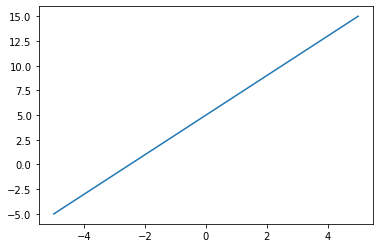

In [85]:
# Generate values for independent variable `x`
X = np.array([-5, 5])
Y = 2*X + 5

_ = plt.plot(X, Y)

This was simple linear function, so two `x` values were enough. However, with more nonlinear function you have to provide a dense grid to get a proper plot.

Below we show plots of:

$$f(x) = \sin(x)$$
$$g(x) = \cos(x)$$

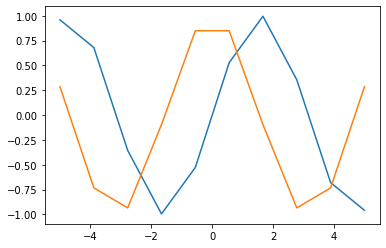

In [86]:
# To sparse a grid of values for X
X_sparse = np.linspace(-5, 5, 10)

_ = plt.plot(X_sparse, np.sin(X_sparse))
_ = plt.plot(X_sparse, np.cos(X_sparse))

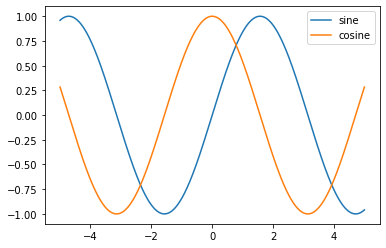

In [88]:
# Proper, dense grid of values for X
X_dense = np.linspace(-5, 5, 1000)

_ = plt.plot(X_dense, np.sin(X_dense), label='sine')
_ = plt.plot(X_dense, np.cos(X_dense), label='cosine')
_ = plt.legend(loc='best')

In [91]:
np.exp(5)

148.4131591025766

$$e^5$$

Note that here we have to calls to `pyplot` which draw two data series on the same plot.
We use `label` argument to assign names to them, which we then can use to easily generate a simple legend.

### Exercise 6. Probability density function of standard normal distribution

Standard normal distribution has the following probability density function:

$$p(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$$

Plot it. What would be a reasonable range of value of x (support) in this case?

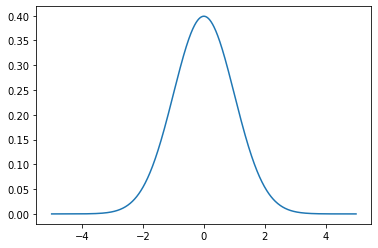

In [95]:
# Your code
X = np.linspace(-5, 5, 1000)
Y = (1 / np.sqrt(2*np.pi)) * np.exp(-1/2*X**2)

_ = plt.plot(X, Y)

### Scatter plots

The second most fundamental type of plot is a scatter plot that shows points on a plane.

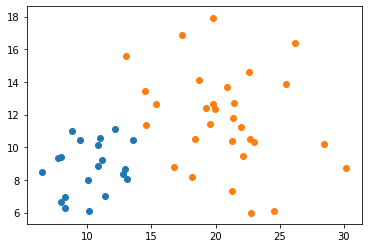

In [96]:
np.random.seed(700)

X1, Y1 = np.random.normal(10, 2, (20,)), np.random.normal(8, 2.2, (20,))
X2, Y2 = np.random.normal(20, 4, (30,)), np.random.normal(12, 3, (30,))

_ = plt.scatter(X1, Y1)
_ = plt.scatter(X2, Y2)

### Exercise 7

(It is similar to one of the previous exercises)

You have two landmark points and a set of other points.

In [97]:
# Landmarks
L = np.array([
    [10., 8.],
    [21., 14.]
])

# Other points
X = np.array([
   [10.65537532, 11.75553032, 10.2438015 , 11.27617932, 10.92449282,  8.33898956,  7.12060104,  7.91033838,  8.66976065, 12.13338894,
     8.34090356, 10.71625218,  6.86878097,  9.75949972,  6.40542673, 10.40846816, 12.7694654 ,  8.82783884,  8.46280746, 10.90185464,
    25.85252142, 18.86690838, 12.88488671, 19.94256508, 17.76185212, 23.78767291, 18.33303976, 20.90630389, 18.48326826, 18.86998929,
    18.65390626, 25.69099097, 17.15384067, 21.024908  , 12.15796957, 19.24130486, 16.95384124, 20.29053166, 20.54089591, 22.87006511,
    18.98676712, 14.95420311, 14.56084402, 21.78222637, 26.40008116, 15.39072287, 18.12252204, 21.88134108, 19.728441  , 19.76442387], 
   [ 6.80590341, 12.4593391 ,  8.63999522,  6.33398434,  6.28210219, 11.69316112,  9.29975522,  7.48038945,  4.48924088,  6.7358552 ,
    10.7618582 ,  4.7551169 , 11.00008083,  9.65007903,  6.24194341, 10.62440694,  1.69655994,  8.77677847,  8.29581413,  9.48440063,
     7.53965525, 14.00299918, 17.0873315 , 10.19568997, 12.94790368, 14.48475401, 11.86610136, 11.95326815, 12.9925746 , 15.67964003,
    10.91753477, 11.99621723,  8.09633454, 11.21578731, 10.83314594, 11.2225141 , 10.99995258, 15.87136058,  8.82076652, 11.64945052,
    13.06093943, 15.92770303, 13.65828605, 14.42156552, 11.4700492 ,  8.27349555,  9.03039074,  9.34838708,  7.37074819, 11.25353002]
]).T
X.shape

(50, 2)

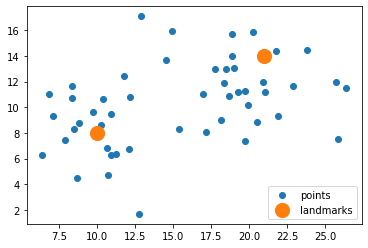

In [98]:
_ = plt.scatter(X[:, 0], X[:, 1], label='points')
_ = plt.scatter(L[:, 0], L[:, 1], label='landmarks', s=200)
_ = plt.legend(loc='lower right')

Recreate the above plot but in such a way that points which are closer to the first landmark have different color than points closer to the second landmark.

Remember that (Euclidean) distance in 2D is:

$$d(\text{point}_i, \text{point}_j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$$

HINT. Remember that in Numpy to negate a boolean array we use `~` unary operator; for instance `~X`.

In [ ]:
# Your code

## Generating random numbers

Remeber, computers never generate anything truly random. The only randomness we can get is pseudorandomness, which is generated with algorithms that are chaotic in a sense that they give very different outputs even for very similar inputs. Hence, if they are seeded with input values that are depend on many things that are independent from our application (i.e. internal clock of the CPU), then they can generate data that looks random enough for most intents and purposes.

At the same time, this non-randomness can be usefull because if we ran the same algorithm with the same seed we are guaranteed to get the same result. Thus, by setting random seed we can ensure that our results will be replicated.

Everything related to random numbers generation in Numpy is implemented in `random` module.

Random numbers are generated with functions provided by `random` module. In general all the functions have similar signatures:

* First they take arguments defining parameters of a probability distribution that will be used (for instance mean and standard deviation for normal distribution)
* Then they take a shape tuple.

In [ ]:
# Set seed
np.random.seed(10101)

# Generate random uniform: <from>, <to>, <shape>
_ = plt.hist(np.random.uniform(0, 1, (1000,)))

In [ ]:
# Generate normal: <mean>, <standard deviation>, <shape>
_ = plt.hist(np.random.normal(0, 1, (1000,)))

In [ ]:
# Generate uniform integers: <from>, <to>, <shape>
_ = plt.hist(np.random.randint(0, 5, (1000,)), bins=5)

In [ ]:
# Generate from t distribtution: <df>, <shape>
_ = plt.hist(np.random.standard_t(5, (1000,)))

In [ ]:
# Generate from log-normal distribution: <mean>, <standard deviation>, <shape>
_ = plt.hist(np.random.lognormal(5, 1, (1000,)))

We can also sample random values from a predefined set.

In [ ]:
values = ['N', 'E', 'S', 'W']
# Sample 10 times with replacement
np.random.choice(values, 10, replace=True)

In [ ]:
# Sample 2 times without replacement
np.random.choice(values, 2, replace=False)

### Exercise 8.

In this exercise we will estimate the value of $\pi$ using numerical methods (a simple Monte Carlo simulation).

The setup is simple. We know that the volume of a circle is:

$$\pi r^2$$

So if $r = 1$ the volume is just $\pi$.

On the other hand the equation of a circle (with $r = 1$) is:

$$1 = x^2 + y^2 \Rightarrow y = \sqrt{1 - x^2}$$

Therefore we can simulate random number uniformly within a unit square (very many such numbers) and check how often they land below the graph of $\sqrt{1 - x^2}$.
This will give us $\frac{1}{4}\pi$.

HINT. You will have to test $x^2 + y^2 <= 1$

HINT 2. Remember that the number of random samples your draw will affect the accuracy of your approximation.

![Monte Carlo estimation of pi](monte-carlo-pi.gif)

In [ ]:
# Your code

### Accumulators

Sometimes we may want to accumulate some values instead of aggregating them into a single thing. There are two main accumulators implemented in Numpy:

* `cumsum` (cumulative sum)
* `cumprod` (cumulative product)

Cumulative sum may be useful for instance to compute and study random walks. Random walk is a process in which we sample random values from some distribution (i.e. standard normal) at each time step and we accumulate generated values. In other words, at each step we start from the position in which we ended after the previous step and we move forward or backward by some random amount.

In one dimension this can be defined as follows:

$$x_0 = 0$$
$$x_{n+1} = x_n + X_{n+1}$$
$$X_i \sim \mathcal{N}(0, 1)$$

In [ ]:
np.random.seed(303)
X = np.random.normal(0, 1, (1000,))

_ = plt.plot(X.cumsum())

Random walks are very interesting when looked at from the perspective of the final position (after $n$) steps.

In out setting we know that $\mathbb{E}[X] = 0$. And we know that $x_n = 0 + X_1 + X_2 + \ldots + X_n$. Thus:

$$\mathbb{E}[x_n] = 0 + \mathbb{E}[X_1] + \mathbb{E}[X_2] + \ldots + \mathbb{E}[X_n] = 0 + 0 + 0 + \ldots + 0 = 0$$

However, since random innovation at each step ($X_i$) are independent, the variance of the process grows:

$$\text{Var}(x_n) = \sum_{i=1}^n \text{Var}(X_i) = n$$

So as the walk becomes longer and longer we get:

$$\lim_{n \to \infty}\text{Var}(x_n) = \lim_{n \to \infty}n = \infty$$

In other words variance of the process becomes infinite. This means that in the long run we can never predict where the random walk will end. And this unpredictability is completely unbiased as on average we remain in the very place we started from.

### Exercise 9.

Plot 100 random walks of length 500 to really see the above result.

Then plot 100 random walks of length 5000 and check how the range of $y$ values changed.

HINT. In this exercise you will **have to use a for-loop** (to draw random walks).

In [ ]:
# Your code | plot 1

In [ ]:
# Your code | plot 2

## Optimization

Optimization is a process of finding minima or maxima of a function of one or many parameters. Since this is a calculus-free class we will discuss only one gradient-free optimization algorithm,
the [Nelder-Mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method) method.

Optimization methods are implemented in `scipy` package which is a sibling on Numpy that provides many more advanced tools for scientific computing.

The Nelder-Mead method as implemented in `scipy` can be used only to find minima and not maxima.

Below we find the minimum of a simple quadratic function: $y = x^2 + 3x + 5$.

In [ ]:
X = np.linspace(-10, 10)

def f(X):
    return X**2 + 3*X + 5

_ = plt.plot(X, f(X))

In [ ]:
from scipy.optimize import minimize

# We have to provide a starting value
# This is something one has to do almost
# always when using numerical optimization
# routines.
#
# In the general case it is important
# that a starting value has to be in the
# domain of the function and the closer
# it approximates the solution the better,
# so if we can make an educated guess
# about the solution, then we should use it.

x0 = -1
solution = minimize(f, x0, method="Nelder-Mead")

In [ ]:
# Get x value that minimizes f(x)
x_min = solution.x
x_min, f(x_min)

In [ ]:
_ = plt.plot(X, f(X))
_ = plt.scatter(x_min, f(x_min), marker="*", s=500, c='r', zorder=200)

Note, that (almost) all optimization routines of this kind find only a single local optimum. This is not a problem when our function has only one global optimum, but when we have more than one we have to be cautious and check whether a solution we get makes sense. This is sometime easy, but usually rather hard. In general, the problem is that our solution will depend on a starting value for our algorithm.

Below we study the simplest case of a function with two different minima, a 4rd degree polynomial (quartic polynomial):

$$f(x) = x^4 + x^3 - 2x^2 - 2x + 1$$

In [ ]:
X = np.linspace(-2, 2, 1000)

def f(X):
    return X**4 + X**3 - 2*X**2 - 2*X + 1

_ = plt.plot(X, f(X))

In [ ]:
x0_1 = -0.5
x0_2 =  0.5

sol1 = minimize(f, x0_1, method='Nelder-Mead').x
sol2 = minimize(f, x0_2, method='Nelder-Mead').x

In [ ]:
_ = plt.plot(X, f(X))
_ = plt.scatter(x0_1, f(x0_1), marker="<", s=200, c='r', zorder=5)
_ = plt.scatter(sol1, f(sol1), marker="*", s=500, c='r', zorder=5)
_ = plt.scatter(x0_2, f(x0_2), marker=">", s=200, c='g', zorder=5)
_ = plt.scatter(sol2, f(sol2), marker="*", s=500, c='g', zorder=5)

We can use Nelder-Mead method also to optimize functions with many arguments. Below we show an example of maximization of a 2D quadratic function.

$$f(x, y) = -x^2 + -y^2 + xy + x + y + 10$$

In [ ]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
XY = np.meshgrid(X, Y)

def f(XY):
    X, Y = XY
    return -X**2 + -Y**2 + X*Y + X + Y + 10

cp = plt.contourf(*XY, f(XY))
_ = plt.colorbar(cp)

In [ ]:
x0 = np.array([0., 0.])

sol = minimize(f, x0, method='Nelder-Mead')

Note that for Nelder-Mead method to work the function that we want to optimize has to be defined in a specific way. It still has to take only one argument and only within the function it can be unpacked and divided into multiple parameters.

In [ ]:
cp = plt.contourf(*XY, f(XY))
_ = plt.colorbar(cp)
_ = plt.scatter(sol.x[0], sol.x[1], marker='*', s=500, c='r')

Something is off. We forgot that the Nelder-Mead method can only minimize. So it does not find the optimium maximum, but instead it tried to minimize and the function has diverging minimum. However, we can easily fix this. It is enough that we redefine out function, so it returns negative values.

In [ ]:
def neg_f(XY):
    return -f(XY)

sol = minimize(neg_f, x0, method='Nelder-Mead')

cp = plt.contourf(*XY, f(XY))
_ = plt.colorbar(cp)
_ = plt.scatter(sol.x[0], sol.x[1], marker='*', s=500, c='r')

### Exercise 10.

Find all optima (minima and maxima) of the following function of two variables:

$$f(x, y) = \frac{xy - x + y}{x^2 + y^2 + 0.4}$$

Visualize your solution by drawing a contour plot with optima marked with stars.

HINT. First visualize the function and look at it carefully.

In [ ]:
# Your code | visualize function

In [ ]:
# Your code | find optima and plot them